# Updates to make as of 5.30.2023 @ 3:39


- Load data
- Split off Val set
- Apply SMOTE
- Hyper tune
- Pipeline those auto tuned parameters into new model
- break off data into test and train
- Run model and test on test and val set using tuned parameters
- Evaluate




# Reviewed and drop state
- ^^^^^ Do This!!!



In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
pd.read_csv("Raw_Data/Churn_Data.csv")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Load the dataset into a Pandas DataFrame:

In [3]:
data = pd.read_csv("Raw_Data/Churn_Data.csv")

# Define the features (X) and the target variable (y):

In [4]:
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

# Cleaning:

In [5]:
data['area code'].unique()

array([415, 408, 510], dtype=int64)

- Was looking to see if area code was a more granular version of 'state'. Removing since there are only 3 types of area code. 

In [6]:
X_encoded = pd.get_dummies(X, columns=['state', 'international plan', 'voice mail plan'])

In [7]:
X_encoded = X_encoded.drop(columns=['phone number', 'area code', 'international plan_no', 'voice mail plan_no'])

In [8]:
X_encoded

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,1,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,1,0


# Train, Test, Validate Spliting

In [9]:
# Split the data into training and temporary sets (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [10]:
# Split the temporary data into testing and validation sets (50% testing, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (2333, 68)
Testing set shape: (500, 68)
Validation set shape: (500, 68)


In [12]:
X_train.to_excel('Testing_Outputs/DT_X_train.xlsx', index=False)

In [13]:
X_train

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
2016,80,0,202.4,118,34.41,260.2,67,22.12,177.4,112,...,0,0,0,0,0,0,0,0,0,0
1362,63,0,132.9,122,22.59,67.0,62,5.70,160.4,121,...,0,0,0,0,0,0,1,0,0,0
2670,116,12,221.0,108,37.57,151.0,118,12.84,179.0,80,...,0,0,0,0,0,0,0,1,0,1
2210,71,0,278.9,110,47.41,190.2,67,16.17,255.2,84,...,0,1,0,0,0,0,0,0,0,0
1846,120,43,177.9,117,30.24,175.1,70,14.88,161.3,117,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,...,0,0,0,0,0,0,0,0,0,0
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,...,0,0,0,0,0,0,0,0,0,0
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,...,0,0,0,0,0,0,0,0,0,0
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,...,0,0,0,0,0,0,0,0,0,0


# Identifying best inputs to use on model

In [14]:
Tester = DecisionTreeClassifier()
Tester.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

# Create an instance of the decision tree classifier
model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(Tester, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [16]:
best_model

DecisionTreeClassifier(max_depth=15, max_features=0.8, min_samples_leaf=4)

In [17]:
# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.936
Precision: 0.8615384615384616
Recall: 0.7088607594936709
F1 Score: 0.7777777777777778


In [18]:
# Use the best model for prediction on the validation set
val_predictions = best_model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.956
Precision: 0.8888888888888888
Recall: 0.75
F1 Score: 0.8135593220338982


# Apply SMOTE

In [19]:
# Apply SMOTE for oversampling
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Fit the best model on the oversampled training data
best_model.fit(X_train_oversampled, y_train_oversampled)

Best Parameters: {'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=15, max_features=0.8, min_samples_leaf=4)

In [20]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

# Create an instance of the decision tree classifier
model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')


In [21]:
# Apply SMOTE for oversampling on the training data
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Fit the grid search to the oversampled training data
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:

# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.858
Precision: 0.5317460317460317
Recall: 0.8481012658227848
F1 Score: 0.6536585365853659


In [23]:

# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.858
Precision: 0.5317460317460317
Recall: 0.8481012658227848
F1 Score: 0.6536585365853659


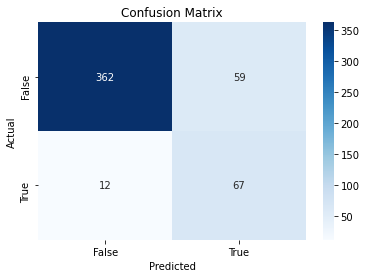

In [24]:
cm = confusion_matrix(y_test, test_predictions)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

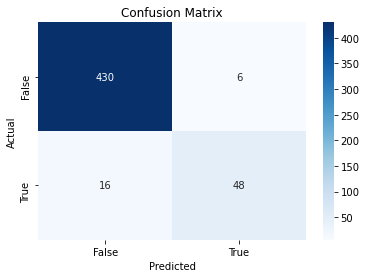

In [25]:
cm = confusion_matrix(y_val, val_predictions)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_val))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

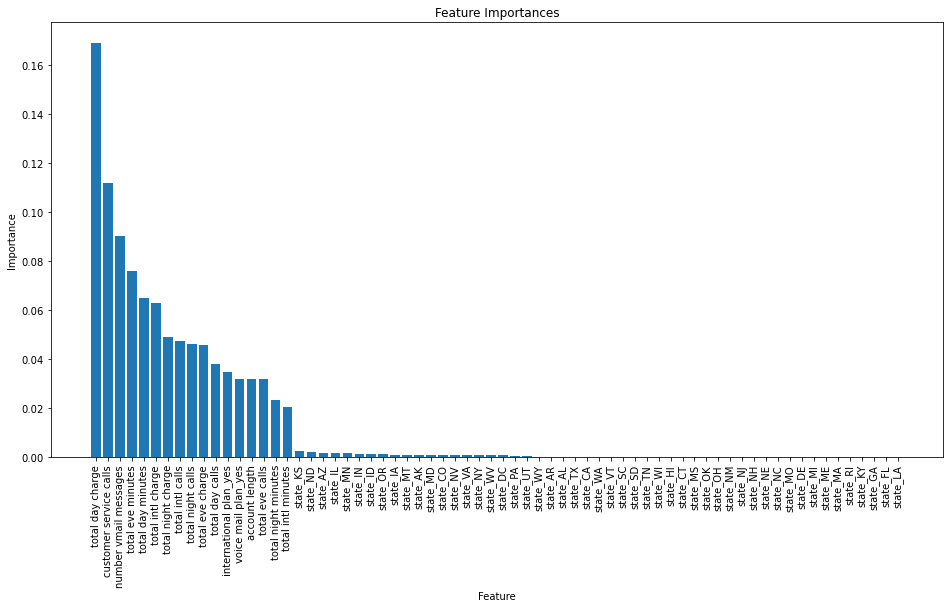

In [29]:
# Get feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create bar plot of feature importances
plt.figure(figsize=(16, 8))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

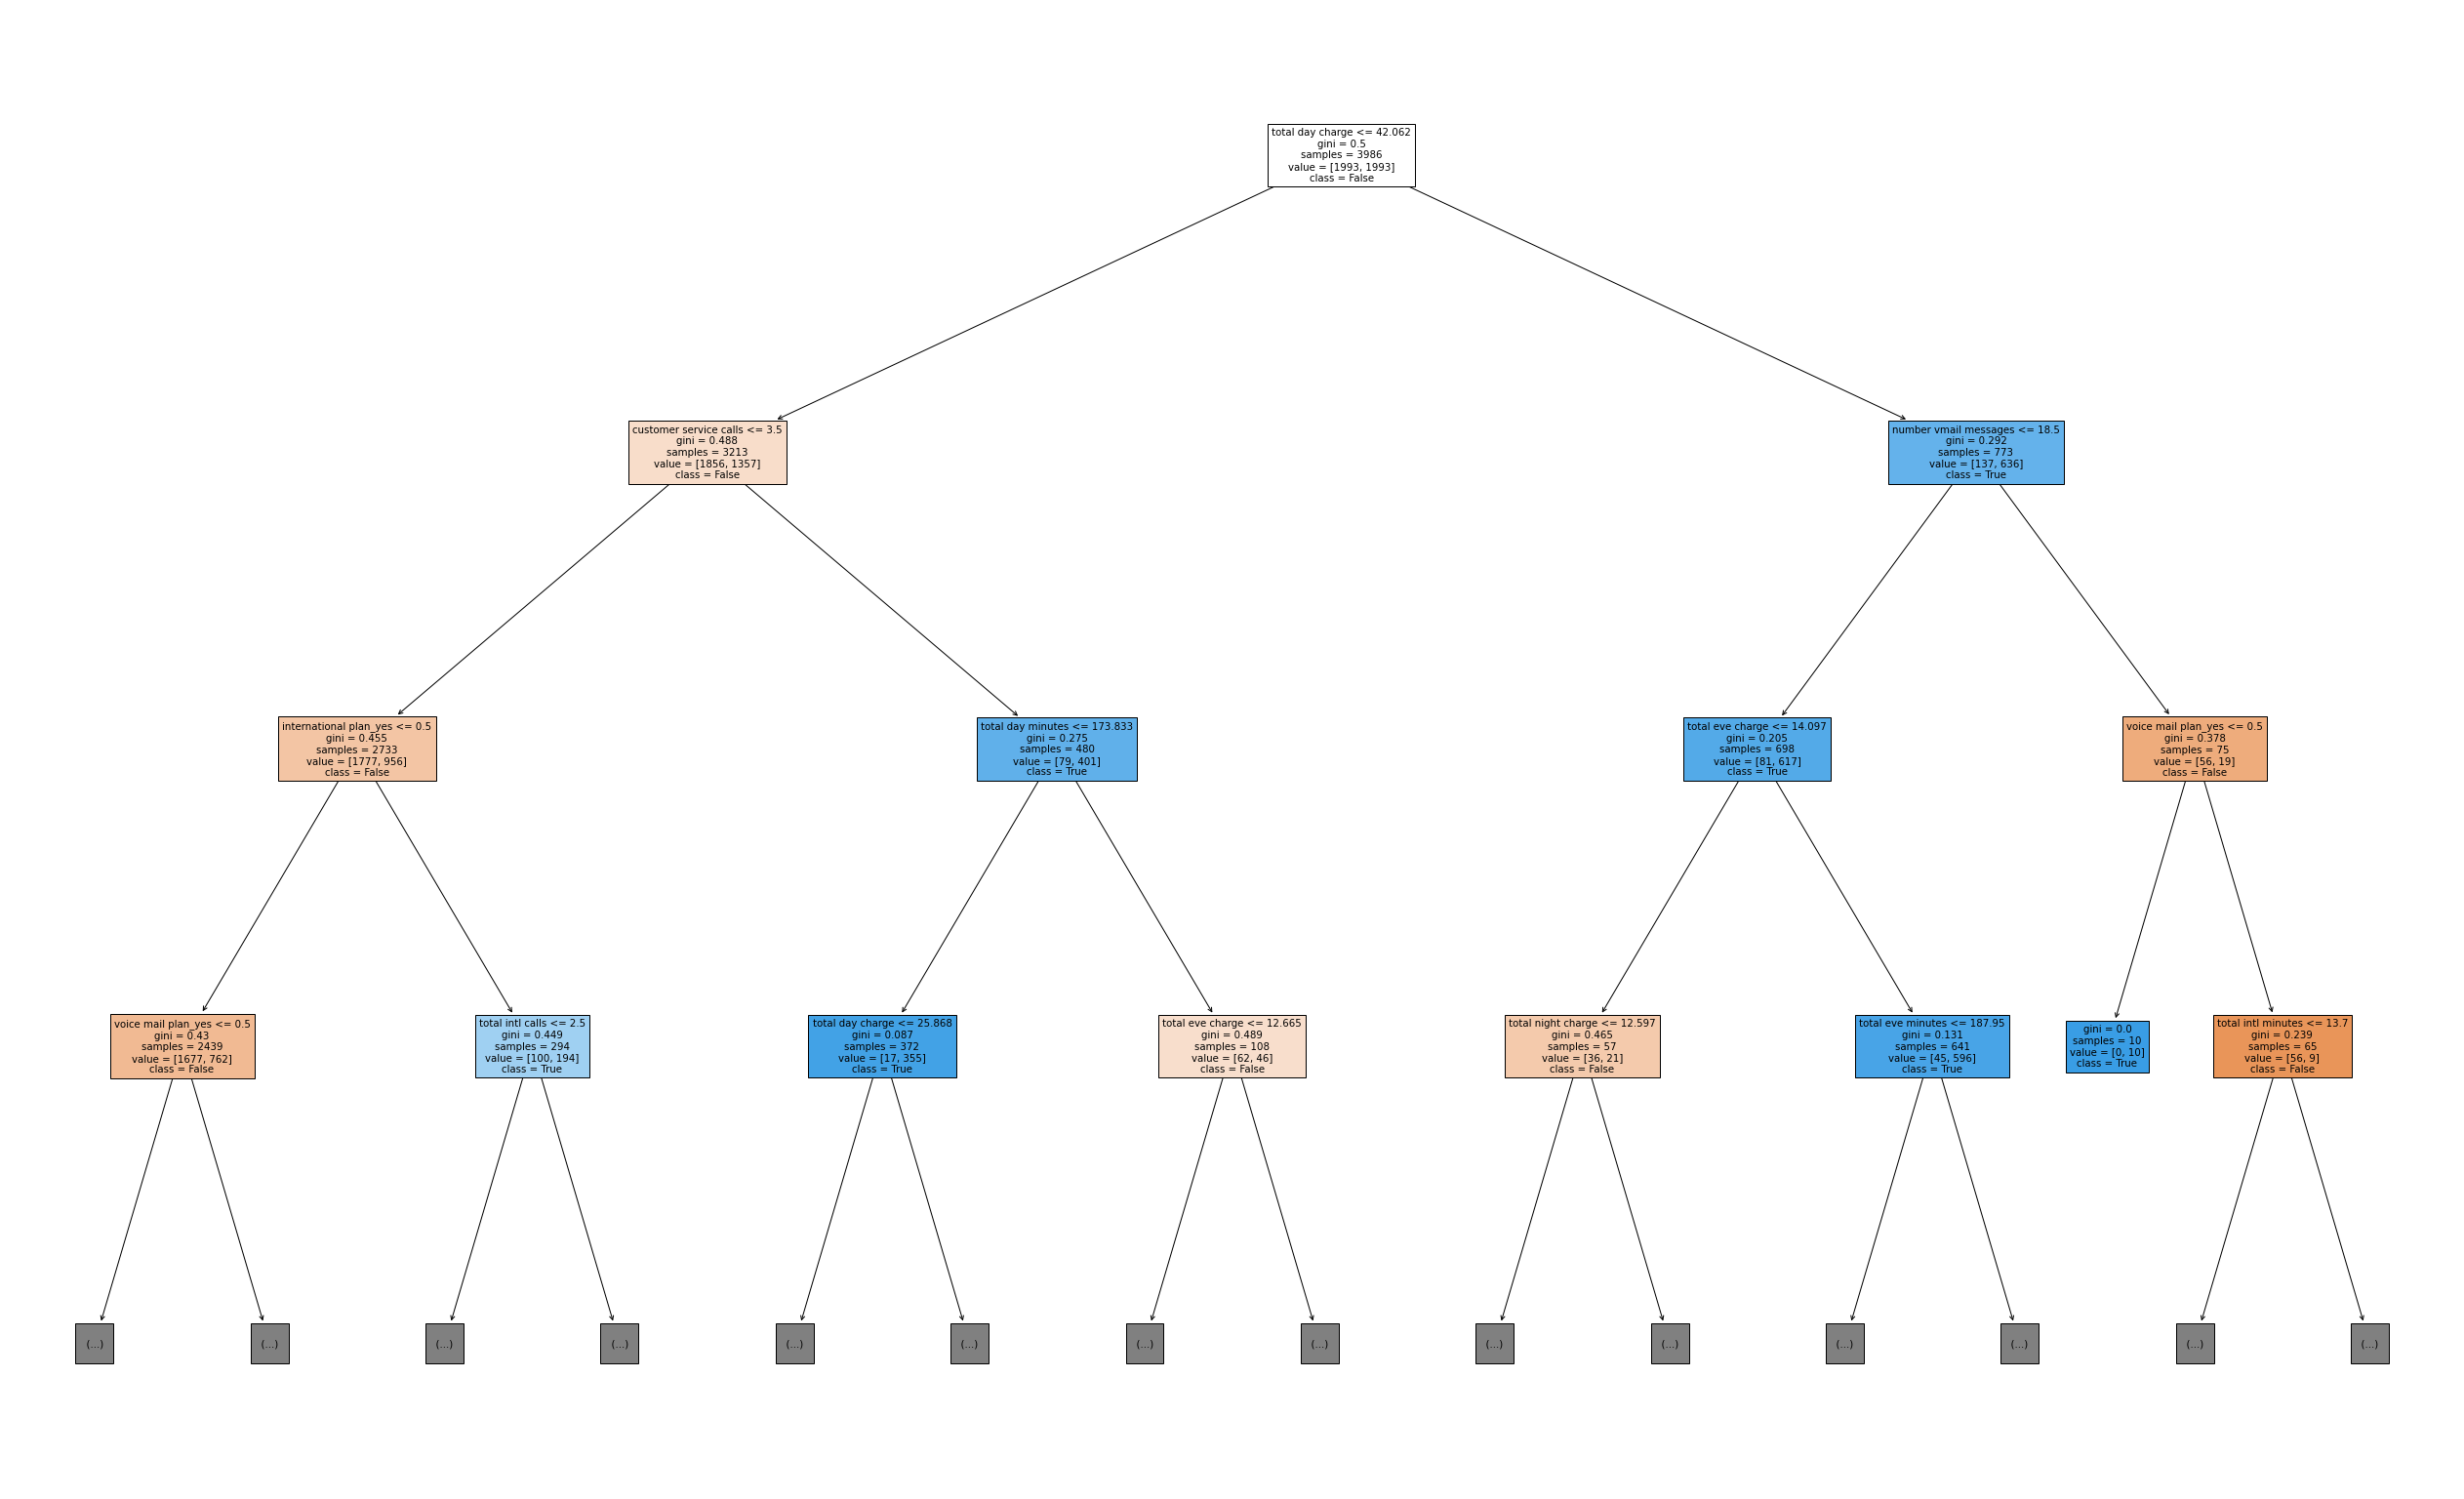

In [31]:
plt.figure(figsize=(45, 28))
plot_tree(best_model, feature_names=X_encoded.columns, max_depth=3, class_names=['False', 'True'], filled=True)
plt.show()

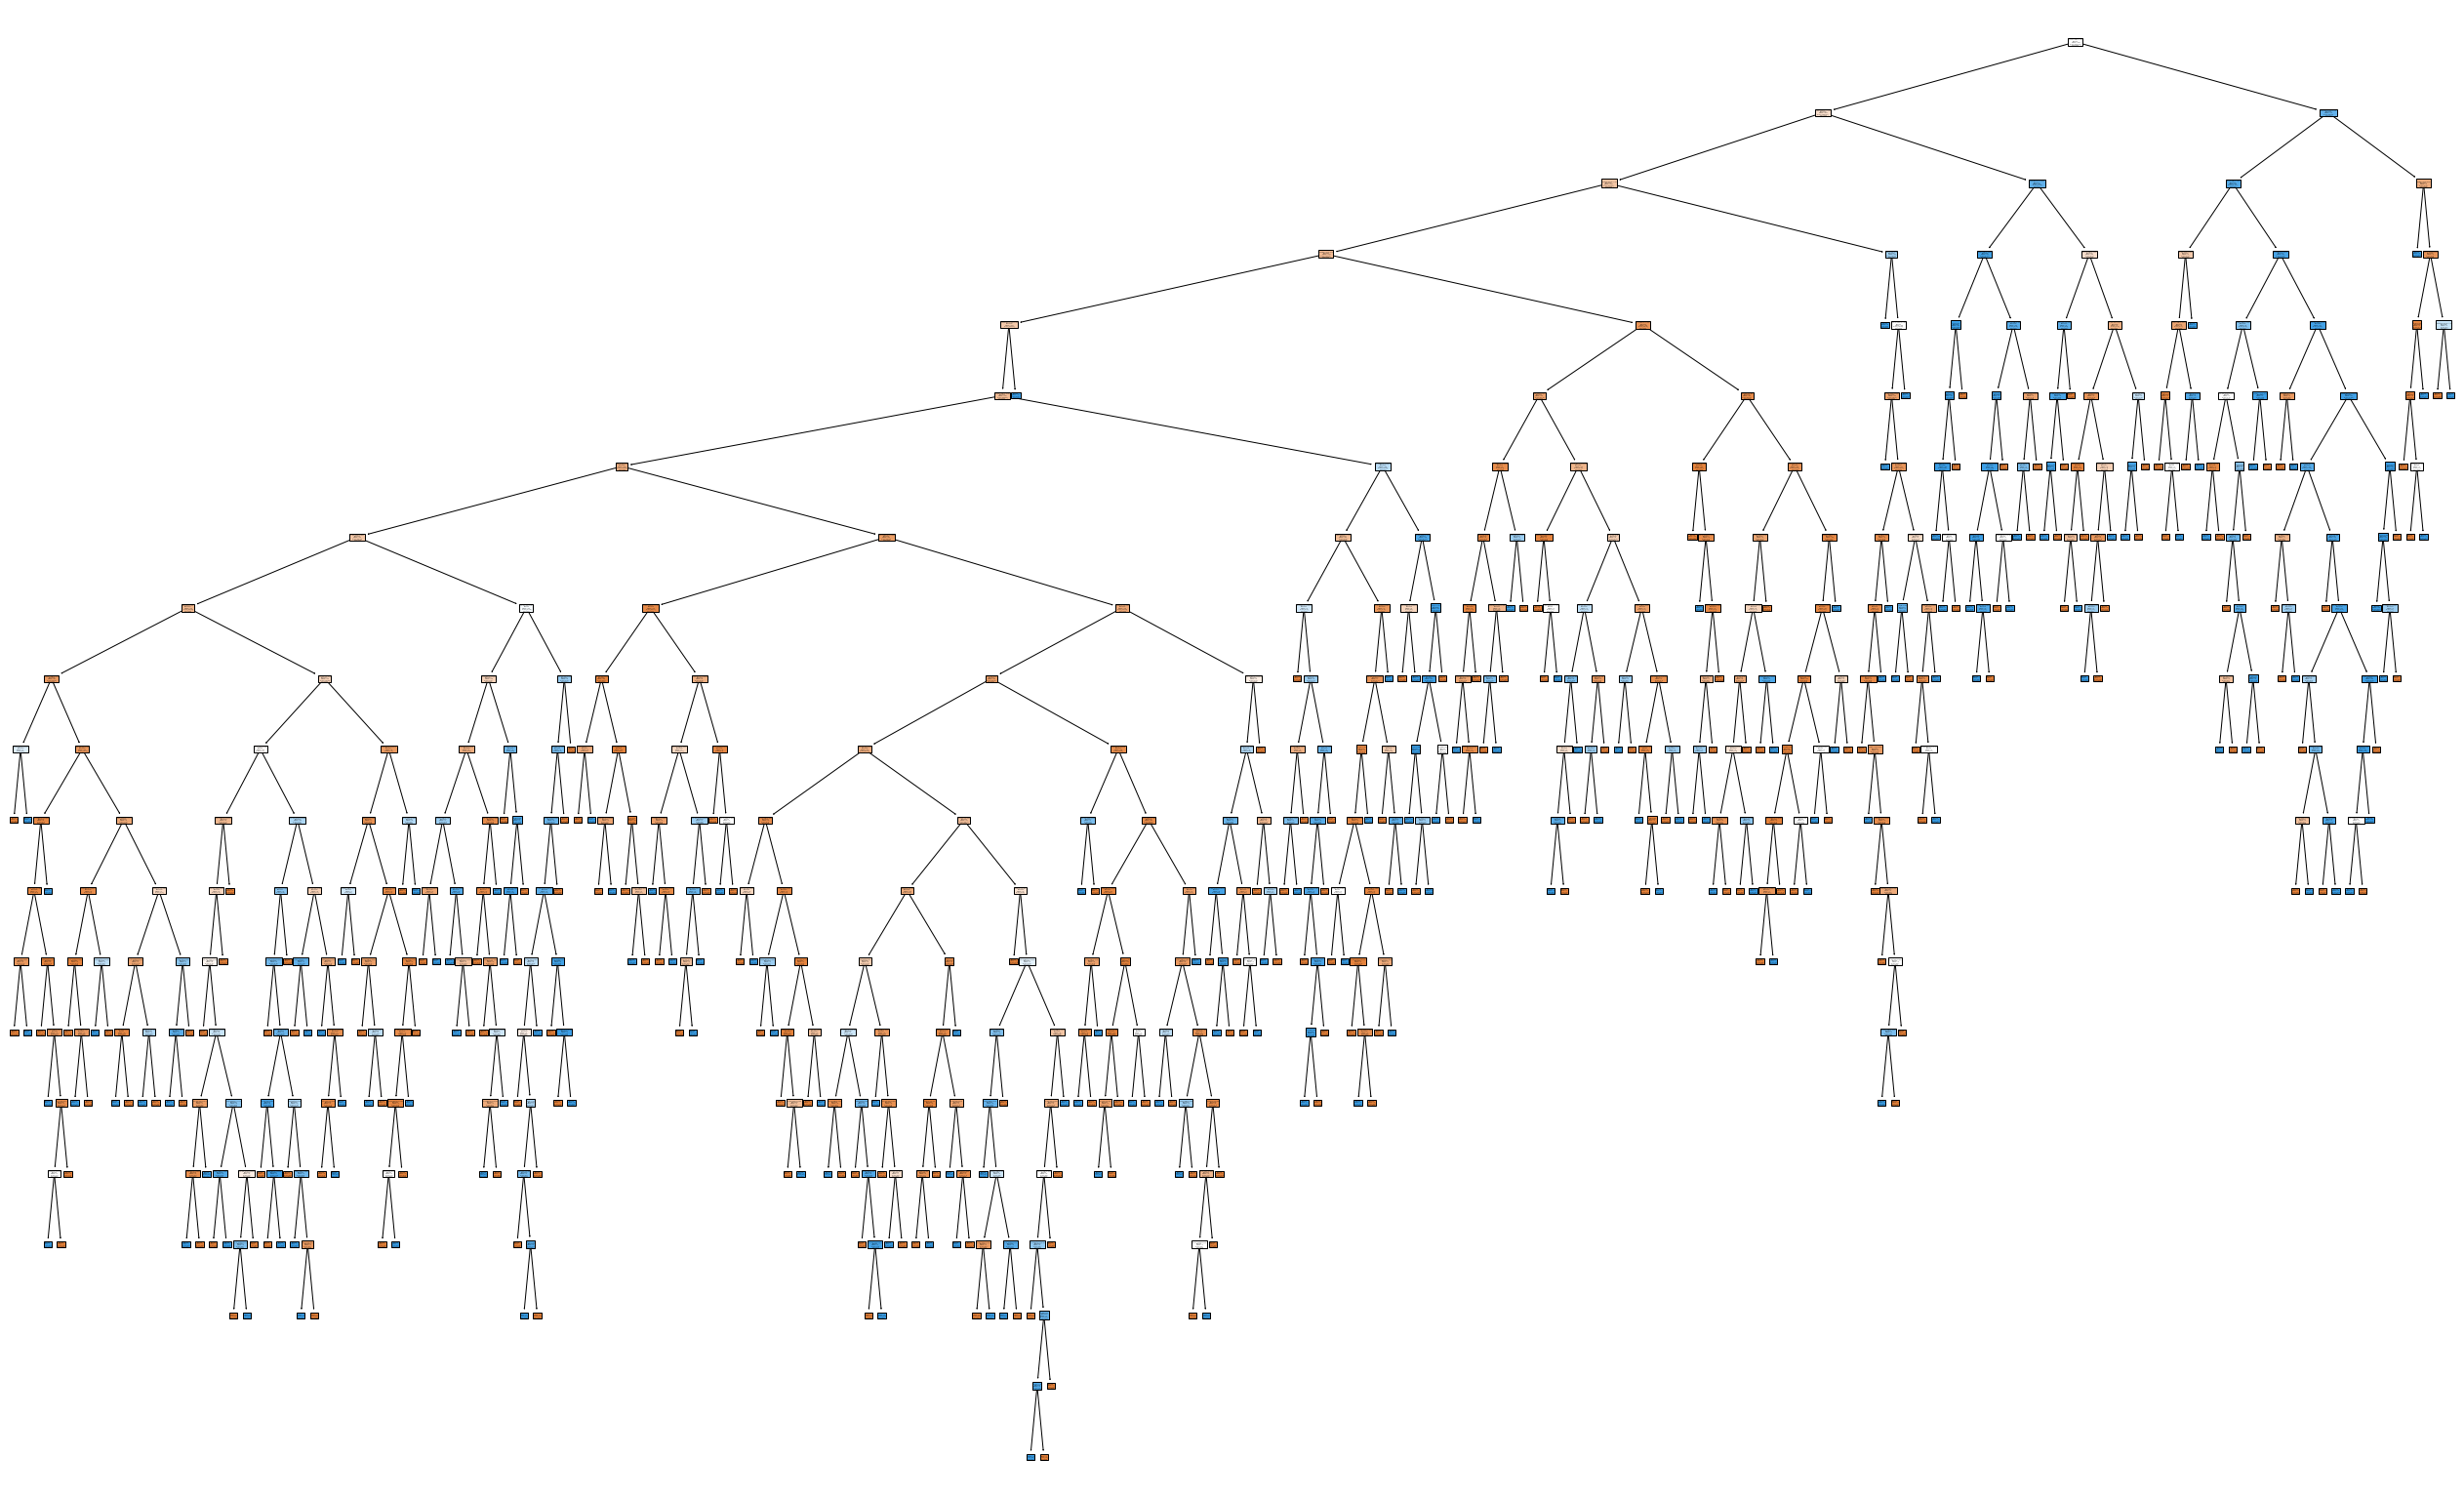

In [27]:
plt.figure(figsize=(45, 28))
plot_tree(best_model, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()